# Restaurant Sales report
**EDA and Analysis Ideas for restaurant business**

# File Description:

#### File Format: CSV
#### Columns: This dataset includes columns such as order_id, date, item_name, item_type, item_price, quantity, transaction_amount, transaction_type, received_by, and time_of_sale.
#### Data Size: This file contains 1000 rows and 10 columns.
#### Data Structure: The dataset is organized as a single CSV file, providing information on transactions at a local restaurant.
#### Data Cleaning and Preprocessing: The data has been carefully reviewed and cleaned to address duplicates and missing values, ensuring data quality for analysis.
#### Date of Last Update: The dataset was last updated on March 31, 2023.
#### Special Notes: Please note that the 'transaction_amount' column represents the total transaction amount, derived from the multiplication of 'item_price' and 'quantity' for each item in the order.
#### Data Source: This data was collected from a local restaurant situated near my home and is made available for analysis and educational purposes.

## Data Description:
This dataset captures sales transactions from a local restaurant near my home. It includes details such as the order ID, date of the transaction, item names (representing various food and beverage items), item types (categorized as Fast-food or Beverages), item prices, quantities ordered, transaction amounts, transaction types (cash, online, or others), the gender of the staff member who received the order, and the time of the sale (Morning, Evening, Afternoon, Night, Midnight). The dataset offers a valuable snapshot of the restaurant's daily operations and customer behavior.

### Columns:

    order_id: a unique identifier for each order.
    date: date of the transaction.
    item_name: name of the food.
    item_type: category of item (Fastfood or Beverages).
    item_price: price of the item for 1 quantity.
    Quantity: how much quantity the customer orders.
    transaction_amount: the total amount paid by customers.
    transaction_type: payment method (cash, online, others).
    received_by: gender of the person handling the transaction.
    time_of_sale: different times of the day (Morning, Evening, Afternoon, Night, Midnight).

In [1]:
import numpy as np
import pandas as pd
from  warnings import filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns
filterwarnings("ignore")

# Read the data

In [2]:
df=pd.read_csv("Balaji Fast Food Sales.csv")

In [3]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


    It is a restaurant data set which serves fastfood and beverages
    There are 10 columns in the dataset
    The Primary column for the data set is order_id
    

In [4]:
#Total number of rows and columns
print("No of Rows:",df.shape[0],"No of columns:",df.shape[1])
print(df.size)

No of Rows: 1000 No of columns: 10
10000


    There are 1000 rows and 10 column ,Size of the dataset is 10000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


    There are 4 integers and 6 object data type in the dataset
    Only transaction_type has 107 null values in it 

In [6]:
#check for duplicate
print("No of Duplicated Rows:",df.duplicated().sum())

No of Duplicated Rows: 0


    There is no duplicate rows in the dataset

In [7]:
#Check the Data type and change if needed

df["date"]=df.date.str.replace("/","-")
df.date=pd.to_datetime(df["date"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            1000 non-null   int64         
 1   date                1000 non-null   datetime64[ns]
 2   item_name           1000 non-null   object        
 3   item_type           1000 non-null   object        
 4   item_price          1000 non-null   int64         
 5   quantity            1000 non-null   int64         
 6   transaction_amount  1000 non-null   int64         
 7   transaction_type    893 non-null    object        
 8   received_by         1000 non-null   object        
 9   time_of_sale        1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 78.3+ KB


In [9]:
#Seperate the Numerical and Categorical
num_col = df.select_dtypes(include=np.number).columns.to_list()
cat_col = df.select_dtypes(include="object").columns.to_list()


In [10]:
print("The numerical columns are:",num_col)

The numerical columns are: ['order_id', 'item_price', 'quantity', 'transaction_amount']


In [11]:
print("The Categorical columns are:",cat_col)

The Categorical columns are: ['item_name', 'item_type', 'transaction_type', 'received_by', 'time_of_sale']


In [12]:
print("The date columns are:","date")

The date columns are: date


In [13]:
df.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

# Measures of central tendency



In [14]:
for i in num_col:
    print("The mean value of the column ",i,"is",df[i].mean())

The mean value of the column  order_id is 500.5
The mean value of the column  item_price is 33.315
The mean value of the column  quantity is 8.162
The mean value of the column  transaction_amount is 275.23


In [15]:
for i in num_col:
    print("The median value of the column ",i,"is",df[i].median())

The median value of the column  order_id is 500.5
The median value of the column  item_price is 25.0
The median value of the column  quantity is 8.0
The median value of the column  transaction_amount is 240.0


In [16]:
for i in num_col:
    if i != "order_id":
        print("The mode value of the column ",i,"is",df[i].mode().values)
#Here order id is ignored because it is unique column/Primary column

The mode value of the column  item_price is [20]
The mode value of the column  quantity is [13]
The mode value of the column  transaction_amount is [300]


In [17]:
for i in cat_col:
    print("The mode value of the column ",i,"is",df[i].mode().values)

The mode value of the column  item_name is ['Cold coffee']
The mode value of the column  item_type is ['Fastfood']
The mode value of the column  transaction_type is ['Cash']
The mode value of the column  received_by is ['Mr.']
The mode value of the column  time_of_sale is ['Afternoon' 'Night']


# Measure of dispersion

In [18]:
for i in num_col:
    print("The range of the column",i,"is",df[i].max()-df[i].min())

The range of the column order_id is 999
The range of the column item_price is 40
The range of the column quantity is 14
The range of the column transaction_amount is 880


    The order id has a wide range the total numnber of rows are 1000 the range is 999 because it is a unique values of the table
    The item_price has a shorter range the price of the items in the shope are in kind of same price
    The quantity order range is 14 there are people who order same item in more quantity
    The transaction_amount range is 880 the bill amount is varied and some people eat less quantity some eat more
    The data likely represents a diverse set of orders with varying item prices and transaction amounts

In [19]:
for i in num_col:
    print("The varience of the column",i,"is",df[i].var())

The varience of the column order_id is 83416.66666666667
The varience of the column item_price is 222.65843343343138
The varience of the column quantity is 19.475231231231273
The varience of the column transaction_amount is 41780.57767767783


    There might be a limited range of item prices, resulting in less variability.
    The high variance in transaction amounts (41780.58) suggests significant variability in the total order values.

In [20]:
for i in num_col:
    print("The STD of the column",i,"is",(df[i].var())**(0.5))

The STD of the column order_id is 288.8194360957494
The STD of the column item_price is 14.921743645882387
The STD of the column quantity is 4.413075031226104
The STD of the column transaction_amount is 204.4029786418922


        The dataset likely contains diverse orders with varying transaction amounts, but the item prices and quantities show less variability.

In [21]:
for i in num_col:
    print("the inter quatile range of the column",i,"is",df[i].quantile(0.75)-df[i].quantile(0.25))

the inter quatile range of the column order_id is 499.5
the inter quatile range of the column item_price is 30.0
the inter quatile range of the column quantity is 8.0
the inter quatile range of the column transaction_amount is 240.0


In [22]:
#five point summery for numerical column
df.describe(percentiles=[0.2,0.4,0.6,0.8])

,order_id,date,item_price,quantity,transaction_amount
count,1000.000000,1000,1000.000000,1000.000000,1000.000000
mean,500.500000,2022-10-03 14:39:50.400000,33.315000,8.162000,275.230000
min,1.000000,2022-04-01 00:00:00,20.000000,1.000000,20.000000
20%,200.800000,2022-06-18 00:00:00,20.000000,3.000000,100.000000
40%,400.600000,2022-08-31 00:00:00,20.000000,7.000000,200.000000
50%,500.500000,2022-10-07 12:00:00,25.000000,8.000000,240.000000
60%,600.400000,2022-11-10 00:00:00,40.000000,10.000000,280.000000
80%,800.200000,2023-01-18 00:00:00,50.000000,13.000000,420.000000
max,1000.000000,2023-03-30 00:00:00,60.000000,15.000000,900.000000
std,288.819436,NaN,14.921744,4.413075,204.402979


In [23]:
for i in num_col:
    print("The skewness of the column",i,"is",df[i].skew())

The skewness of the column order_id is 0.0
The skewness of the column item_price is 0.6250044803515558
The skewness of the column quantity is -0.05129947454908782
The skewness of the column transaction_amount is 1.052643178230624


    A positive skewness (1.05) suggests that the transaction amount distribution is right-skewed.
    A small negative skewness (-0.05) indicates a slight left-skewed distribution,but the skewness is negligable
    There might be some higher-priced items that contribute to the skewness.

In [24]:
for i in num_col:
    print("The kurtosis of the column",i,"is",df[i].kurtosis())

The kurtosis of the column order_id is -1.2
The kurtosis of the column item_price is -1.173262217524134
The kurtosis of the column quantity is -1.2416861155903576
The kurtosis of the column transaction_amount is 0.6554065709917558


    The negative kurtosis indicates a platykurtic distribution for item prices.
    The negative kurtosis implies a platykurtic distribution for quantities.
    The positive kurtosis suggests a leptokurtic distribution for transaction amounts.

In [25]:
for i in cat_col:
    print("The unique value percentage of the column",i,"is",df[i].value_counts(normalize=1).sort_values(ascending=0)*100)
    print(" ")
    print("******************")

The unique value percentage of the column item_name is item_name
Cold coffee        16.1
Sugarcane juice    15.3
Panipuri           15.0
Frankie            13.9
Aalopuri           13.4
Vadapav            13.4
Sandwich           12.9
Name: proportion, dtype: float64
 
******************
The unique value percentage of the column item_type is item_type
Fastfood     68.6
Beverages    31.4
Name: proportion, dtype: float64
 
******************
The unique value percentage of the column transaction_type is transaction_type
Cash      53.303471
Online    46.696529
Name: proportion, dtype: float64
 
******************
The unique value percentage of the column received_by is received_by
Mr.     51.2
Mrs.    48.8
Name: proportion, dtype: float64
 
******************
The unique value percentage of the column time_of_sale is time_of_sale
Night        20.5
Afternoon    20.5
Evening      20.1
Midnight     19.9
Morning      19.0
Name: proportion, dtype: float64
 
******************


    The cold coffee is the most selling item
    People prefer fastfood in the restaurant
    The cash transaction happens more in the shop
    Male staff receive more customers
    Customer vist mostly in afternoon and night


# Correlation Analysis

In [26]:
df.corr(numeric_only=True)

,order_id,item_price,quantity,transaction_amount
order_id,1.000000,0.037028,0.010345,0.043970
item_price,0.037028,1.000000,0.050361,0.637238
quantity,0.010345,0.050361,1.000000,0.731806
transaction_amount,0.043970,0.637238,0.731806,1.000000


    Quantity and transaction amount have the strongest positive relationship.
    Item price and transaction amount also show a strong positive correlation.

In [27]:

for i in num_col:
    for j in num_col:
        if i != j:  # to avoid correlation of a column with itself
            correlation = df[i].corr(df[j])
            print('Correlation between columns', i, 'and', j, 'is', correlation)
            if correlation > 0:
                if correlation <= 0.2:
                    print('Column', i, 'and column', j, 'are slightly positively correlated with each other')
                elif 0.2 < correlation <= 0.7:
                    print('Column', i, 'and column', j, 'are moderately positively correlated with each other')
                else:
                    print('Column', i, 'and column', j, 'are highly positively correlated with each other')
            elif correlation < 0:
                if correlation >= -0.2:
                    print('Column', i, 'and column', j, 'are slightly negatively correlated with each other')
                elif -0.7 <= correlation < -0.2:
                    print('Column', i, 'and column', j, 'are moderately negatively correlated with each other')
                else:
                    print('Column', i, 'and column', j, 'are highly negatively correlated with each other')
            else:
                print('Column', i, 'and column', j, 'have no correlation with each other')
            print()


Correlation between columns order_id and item_price is 0.0370275106631398
Column order_id and column item_price are slightly positively correlated with each other

Correlation between columns order_id and quantity is 0.010344714439708013
Column order_id and column quantity are slightly positively correlated with each other

Correlation between columns order_id and transaction_amount is 0.043969873282466626
Column order_id and column transaction_amount are slightly positively correlated with each other

Correlation between columns item_price and order_id is 0.03702751066313981
Column item_price and column order_id are slightly positively correlated with each other

Correlation between columns item_price and quantity is 0.05036062705771536
Column item_price and column quantity are slightly positively correlated with each other

Correlation between columns item_price and transaction_amount is 0.6372377142715335
Column item_price and column transaction_amount are moderately positively corr

# Missing values

In [28]:

df.isnull().sum()/len(df)*100


order_id               0.0
date                   0.0
item_name              0.0
item_type              0.0
item_price             0.0
quantity               0.0
transaction_amount     0.0
transaction_type      10.7
received_by            0.0
time_of_sale           0.0
dtype: float64

In [29]:
df["month"]=df.date.dt.month

In [30]:
df.transaction_type.fillna(df.transaction_type.mode()[0],inplace=True)
#The data is catogorical and the missing value is 10% so here we used mode to fill the null values

In [31]:
plt.rcParams['figure.figsize']=[15,20]

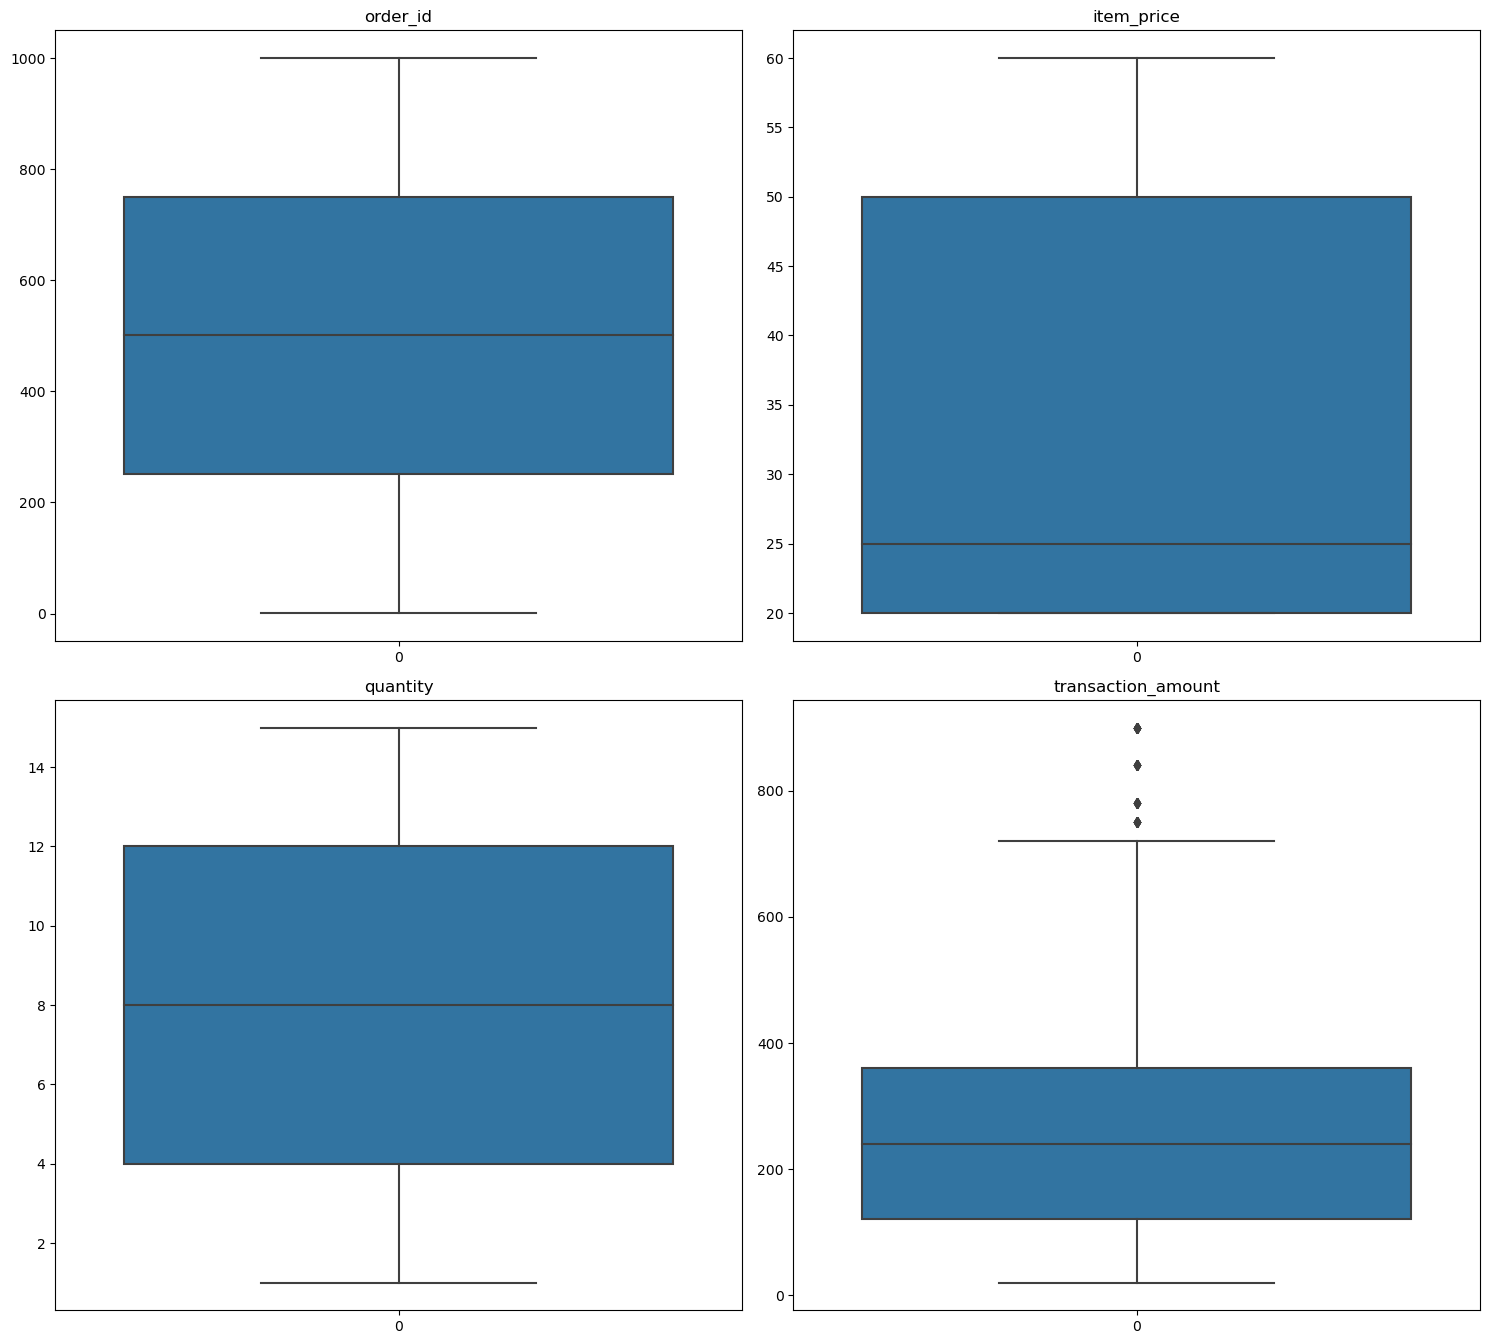

In [32]:
#Outlayer Check
t =1
for i in num_col:
    plt.subplot(3,2,t)
    sns.boxplot(df[i])
    plt.title(i)
    t +=1
plt.tight_layout()
plt.show()

    Only transaction amount has outlayers
    
    

In [33]:
q1=df.transaction_amount.quantile(0.25)
q3=df.transaction_amount.quantile(0.75)
iqr = q3-q1
u=q3+(1.5*iqr)
l=q1-(1.5*iqr)
a=df[(df["transaction_amount"]>u)|(df["transaction_amount"]<l)].index.to_list()
print("Total number of Oulayer in Transaction Amount:",len(a))

Total number of Oulayer in Transaction Amount: 44


In [34]:
#Removal of outlayers
df.drop(index=a,inplace=True)

# Distrubution of categorical column 

In [35]:
plt.rcParams['figure.figsize']=[18,18]

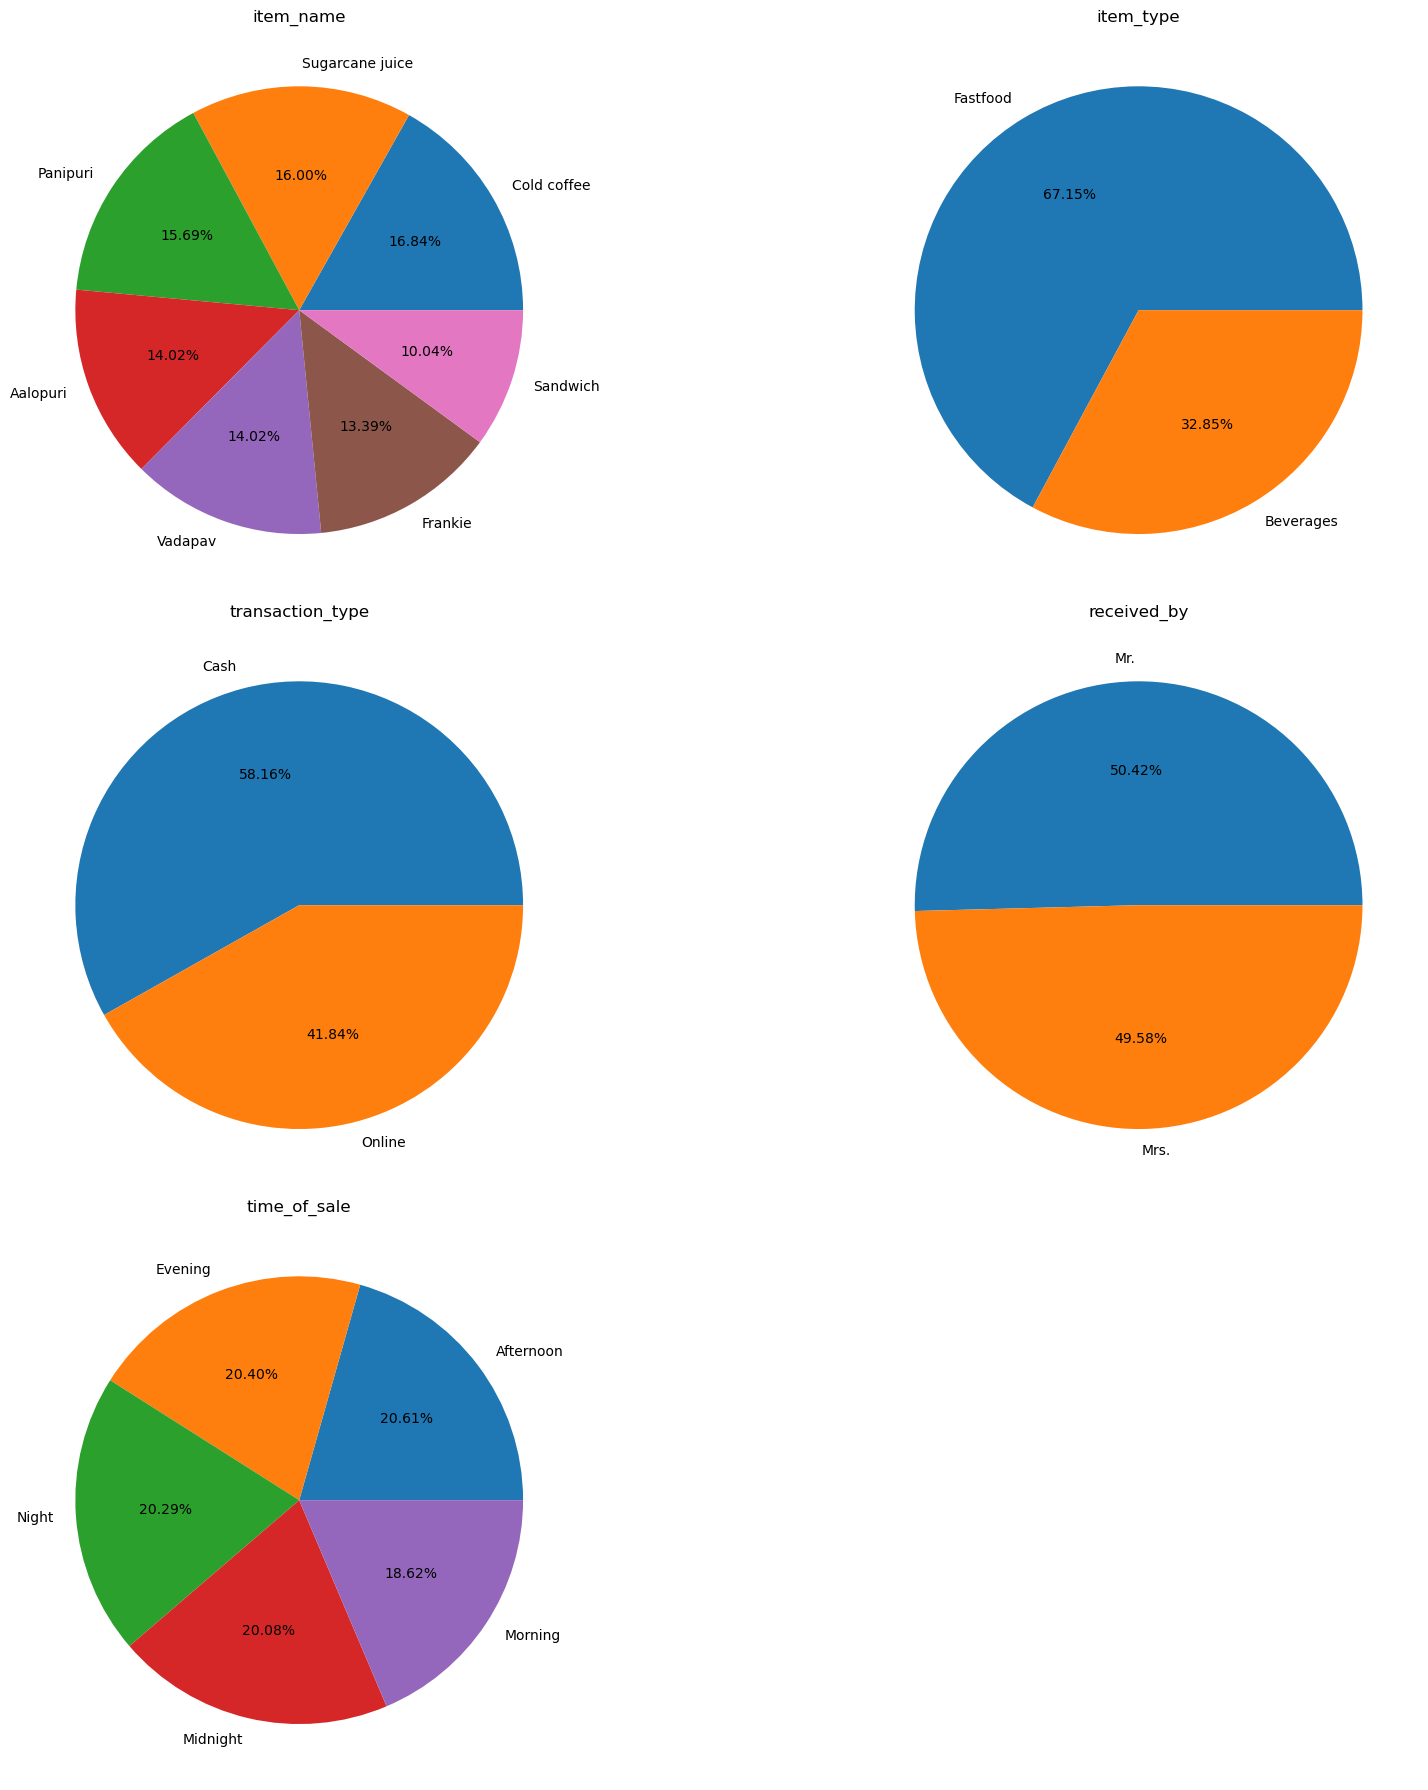

In [36]:
t = 1
for i in cat_col:
    val=df[i].value_counts()
    plt.subplot(3,2,t)
    plt.pie(x=val,labels=val.index,autopct="%.2f%%")
    plt.title(i)
    t +=1
plt.tight_layout()
plt.show()

    The cold coffee is the most selling item
    People prefer fastfood in the restaurant
    The cash transaction happens more in the shop
    Male staff receive more customers
    Customer vist mostly in afternoon and night


# Distribution of numerical column

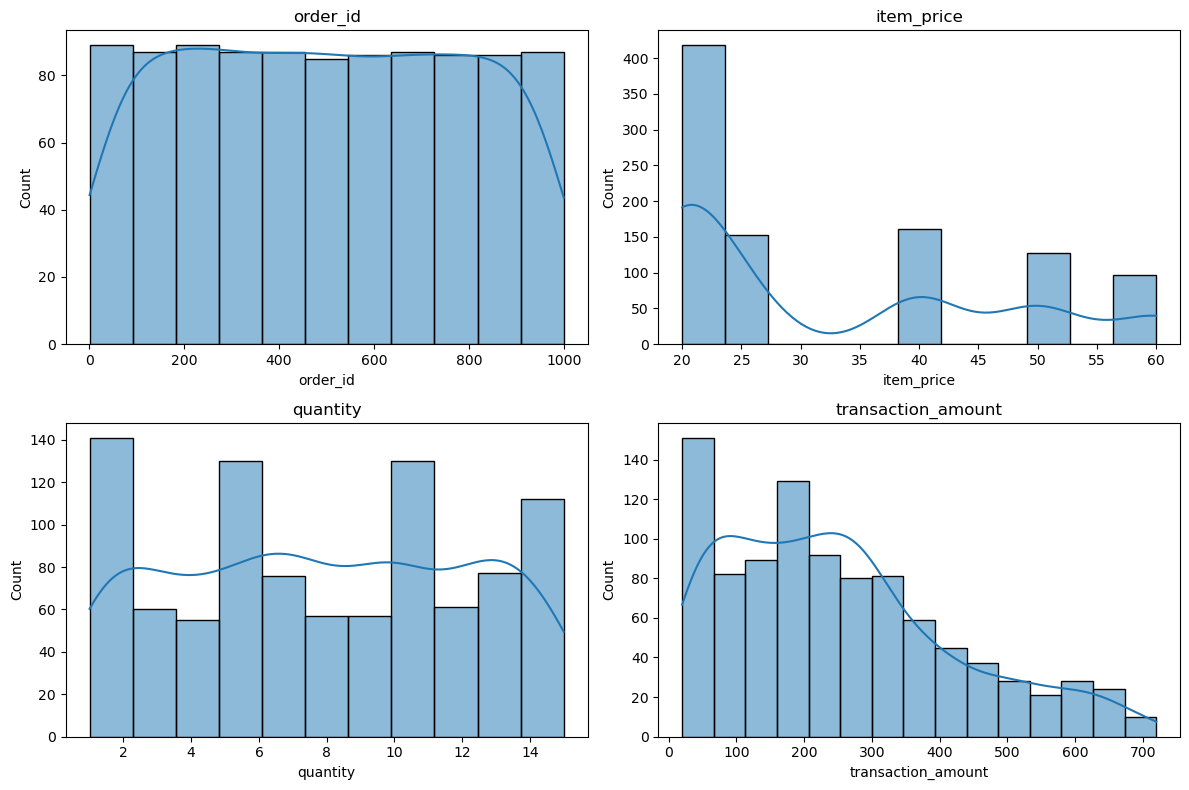

In [37]:
t =1
plt.rcParams['figure.figsize']=[12,8]
for i in num_col:
    plt.subplot(2,2,t)
    sns.histplot(df[i],kde =1)
    plt.title(i)
    t +=1
plt.tight_layout()
plt.show()

    The histogram shows a peak around 20, indicating that this price point is more common.
    The histogram is relatively flat, suggesting consistent quantities across orders.
    The histogram shows a peak around 890, indicating frequent transaction amounts in this range.

# Relationship between two numerical columns

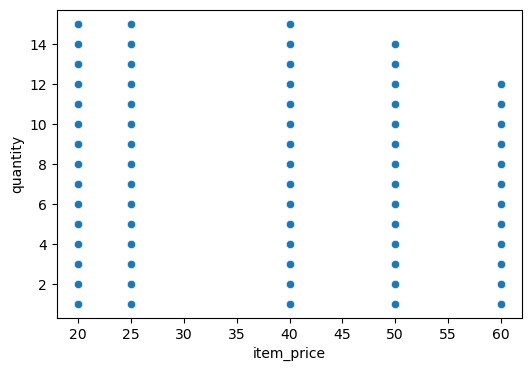

In [38]:
plt.rcParams['figure.figsize']=[6,4]
sns.scatterplot(x=df.item_price,y=df.quantity)
plt.show()

    The scatterplot shows there is very minumun relationship between quantity and item price 

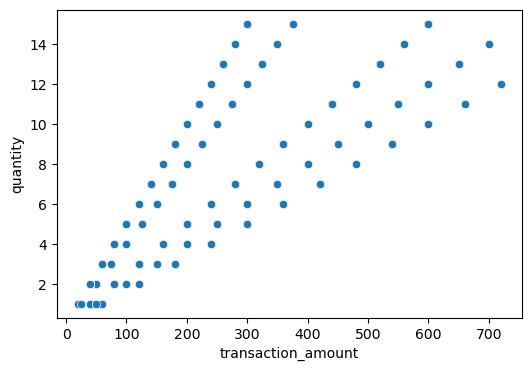

In [39]:
plt.rcParams['figure.figsize']=[6,4]
sns.scatterplot(x=df.transaction_amount,y=df.quantity)
plt.show()

     The scatterplot shows there is Strong relationship between quantity and Transaction Amount

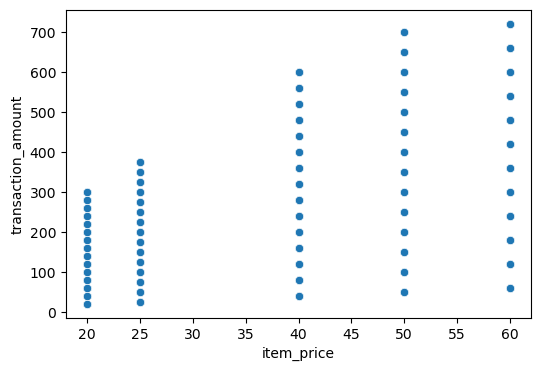

In [40]:
plt.rcParams['figure.figsize']=[6,4]
sns.scatterplot(x=df.item_price,y=df.transaction_amount)
plt.show()


    Item Price and Transaction Amount have positive Correlation

<Axes: xlabel='month'>

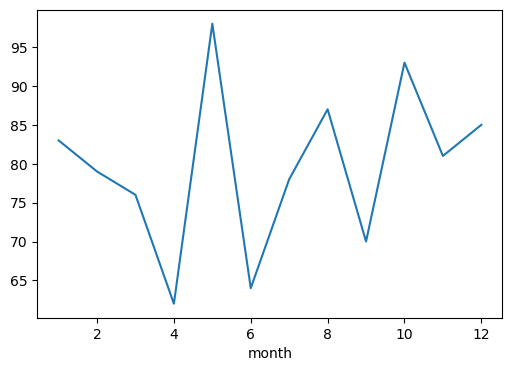

In [41]:
plt.rcParams['figure.figsize']=[6,4]
df.groupby("month")["order_id"].count().plot(kind="line")

    In the month of May the sales is more
    In the month of April the sales is less

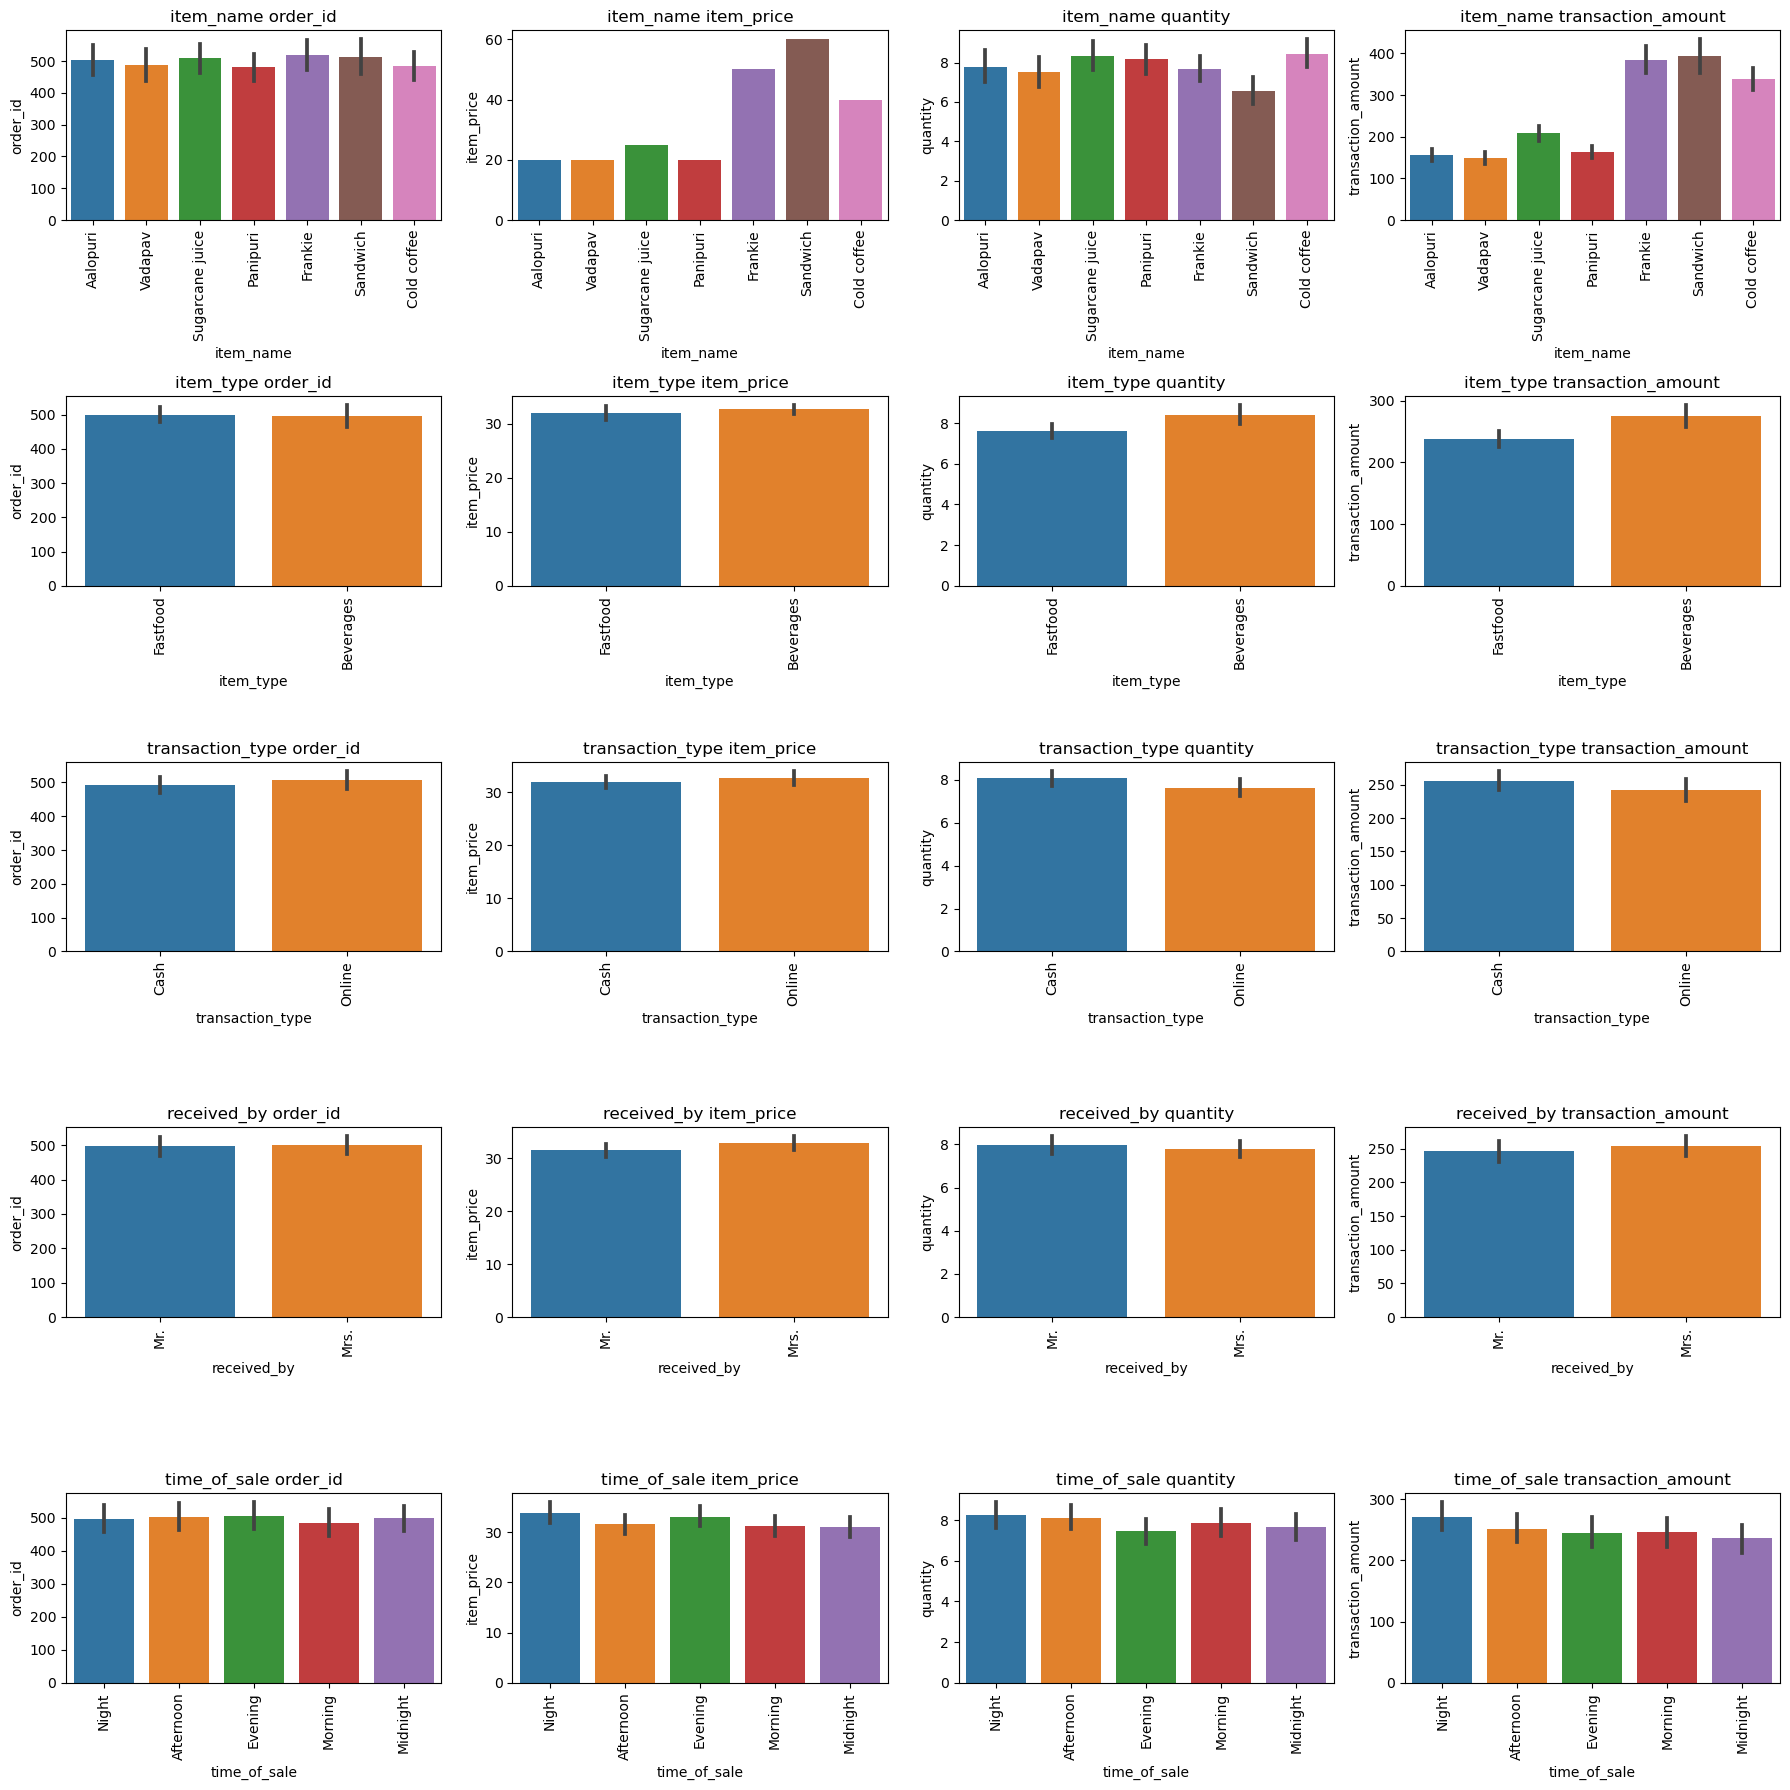

In [42]:
t = 1
plt.rcParams['figure.figsize']=[18,18]
for i in cat_col:
    for j in num_col:
        plt.subplot(5,4,t)
        sns.barplot(x=df[i],y=df[j])
        plt.xticks(rotation=90)
        plt.title(i+" "+j)
        t +=1
plt.tight_layout()

plt.show()

    Sandwich is high priced
    Frankie is most orderd item
    cold coffee is most quantity ordered
    sandwich is less quantity ordered
    Vadapav is least Transaction amount
    Sandwich has high Transaction amount
    Online transaction is done more in numbers
    Cash transaction has done high Transaction amount
    Resived by Female is high nd has positive impact
    Night has high impact with all numerical values
    


# Relationship between two categoprical column

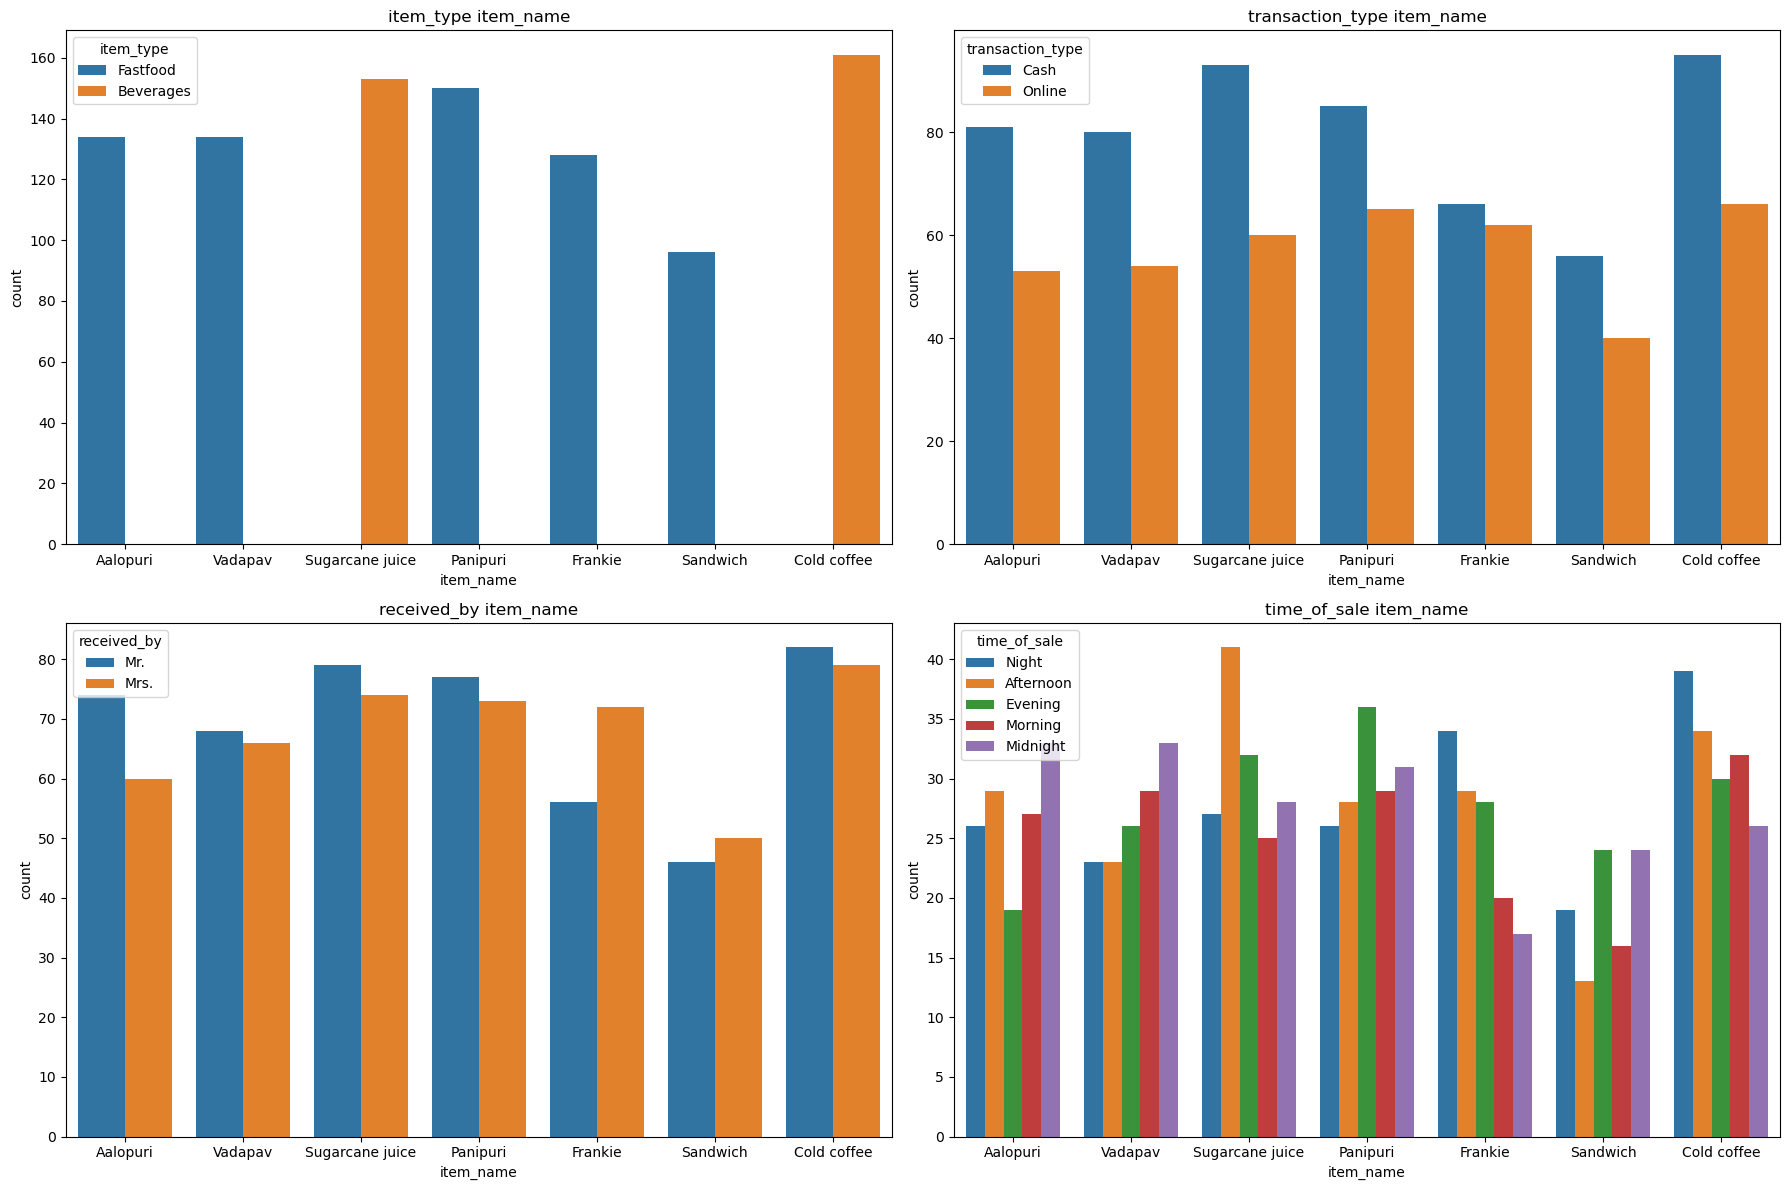

In [43]:
t = 1
plt.rcParams['figure.figsize']=[18,12]
for i in cat_col:
    if i != "item_name":
        plt.subplot(2,2,t)
        sns.countplot(x=df["item_name"],hue=df[i])
        plt.title(i+" "+"item_name")
        t +=1
plt.tight_layout()
plt.show()

    Only there are two item in beverages and five fastfood items
    Cash payment is more in all items
    Both men and women sell cold coffee more
    The most selling item cold coffee sold mostly in night
    

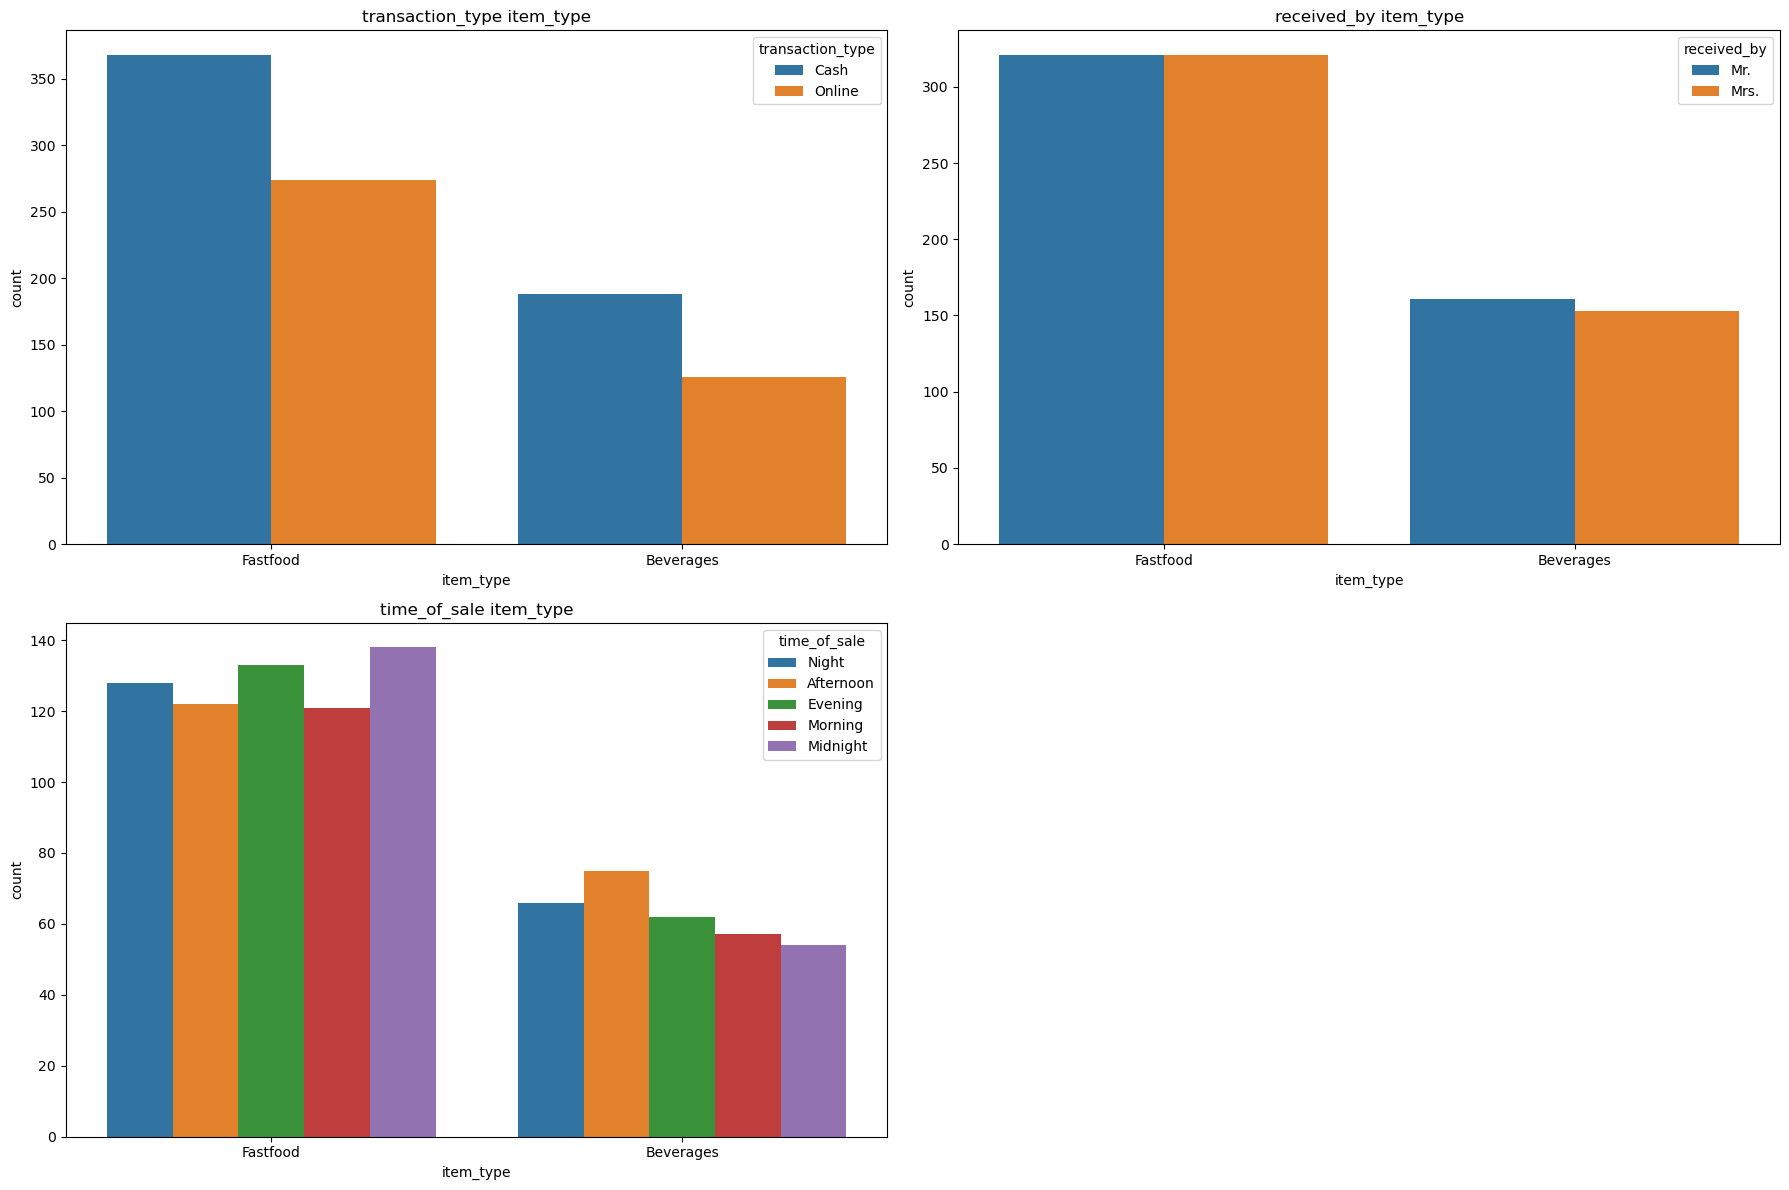

In [44]:
t = 1
plt.rcParams['figure.figsize']=[18,12]
for i in [ "transaction_type" ,"received_by" , "time_of_sale"]:
        plt.subplot(2,2,t)
        sns.countplot(x=df["item_type"],hue=df[i])
        plt.title(i+" "+"item_type")
        t +=1
plt.tight_layout()
plt.show()

    Fast Food is selled more in all the plots
    In mid night Fast food is normaly selled high
    

# Multivariant analysis

<Axes: xlabel='quantity', ylabel='transaction_amount'>

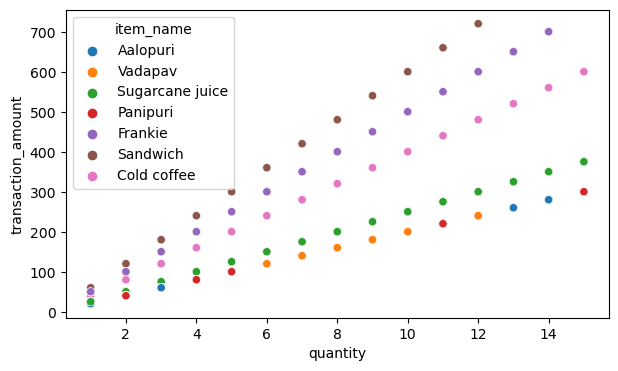

In [45]:
plt.rcParams['figure.figsize']=[7,4]
sns.scatterplot(x=df.quantity,y=df.transaction_amount,hue=df.item_name)

    In all type of items the transaction and quantity is highly correlated

In [46]:
cat_col

['item_name', 'item_type', 'transaction_type', 'received_by', 'time_of_sale']

In [47]:
num_col

['order_id', 'item_price', 'quantity', 'transaction_amount']

<Axes: xlabel='item_price', ylabel='quantity'>

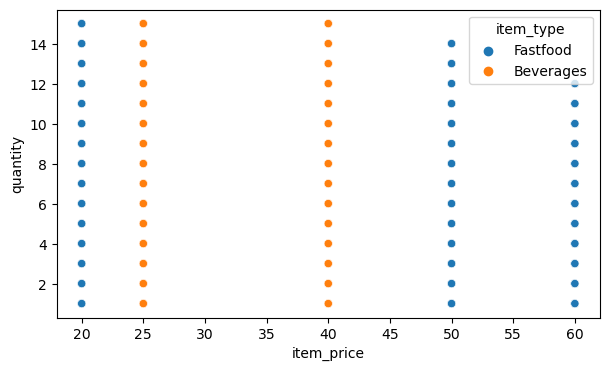

In [48]:
plt.rcParams['figure.figsize']=[7,4]
sns.scatterplot(x=df.item_price,y=df.quantity,hue=df.item_type)

    Either it is fastfood or Beverages Item price did not affect the quantity 

<Axes: xlabel='item_type', ylabel='transaction_amount'>

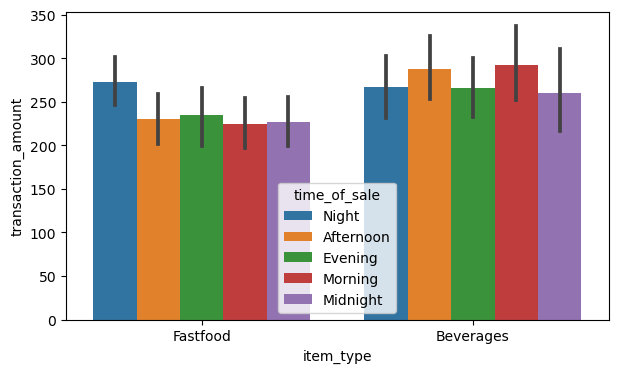

In [49]:
plt.rcParams['figure.figsize']=[7,4]
sns.barplot(x=df.item_type,y=df.transaction_amount,hue=df.time_of_sale)

    Only in night time fast food sales is more in all other time beverages transaction is high

# Statistical Analysis 

In [50]:
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [51]:
#Here i have taken confidance interval as 95%

In [52]:
for i in num_col:
    test_stat,pvalue=stats.shapiro(df[i])
    print(i,"=",pvalue)
    

order_id = 1.1487254366381928e-16
item_price = 5.791562861698002e-34
quantity = 2.710868563502672e-18
transaction_amount = 9.940224251170905e-20


    ho = data is normal
    ha = data is not normal

    For all numerical columns pvalue < 0.05  
    Hence data is not normally distributed
    

# One-Way ANOVA of Item Name and Transaction Amount

In [53]:
df.item_name.value_counts()

item_name
Cold coffee        161
Sugarcane juice    153
Panipuri           150
Aalopuri           134
Vadapav            134
Frankie            128
Sandwich            96
Name: count, dtype: int64

In [54]:
cold_coffee = df.transaction_amount[df.item_name=="Cold coffee"]
sug_juice = df.transaction_amount[df.item_name=="Sugarcane juice"]
panipuri = df.transaction_amount[df.item_name=="Panipuri"]
aalopuri = df.transaction_amount[df.item_name=="Aalopuri"]
vadapav =df.transaction_amount[df.item_name=="Vadapav"]
frankie =df.transaction_amount[df.item_name=="Frankie"]
sandwich =df.transaction_amount[df.item_name=="Sandwich"]

In [55]:
#normality test
print(stats.shapiro(cold_coffee))
print(stats.shapiro(sug_juice))
print(stats.shapiro(panipuri))
print(stats.shapiro(aalopuri))
print(stats.shapiro(vadapav))
print(stats.shapiro(frankie))
print(stats.shapiro(sandwich))


ShapiroResult(statistic=0.9485397338867188, pvalue=1.2732953109662049e-05)
ShapiroResult(statistic=0.9262294769287109, pvalue=4.384647809274611e-07)
ShapiroResult(statistic=0.9328422546386719, pvalue=1.5739504988232511e-06)
ShapiroResult(statistic=0.9064022302627563, pvalue=1.206483659643709e-07)
ShapiroResult(statistic=0.930249810218811, pvalue=3.372648507138365e-06)
ShapiroResult(statistic=0.9545128345489502, pvalue=0.0002886801084969193)
ShapiroResult(statistic=0.9405805468559265, pvalue=0.00028553680749610066)


    P-value<0.05 hence data is not normal.

    However, ANOVA is robust to violation of normality rule, provided variances are equal.



    #for leneve
    Ho = All variance are equal
    Ha = Atlest one variance is not equal

In [56]:
stats.levene(cold_coffee,sug_juice,panipuri,aalopuri,vadapav,frankie,sandwich)

LeveneResult(statistic=36.00884468377604, pvalue=2.140007475322284e-39)

    #for Annova
    Ho = All variance are equal
    Ha = Atlest one variance is not equal

In [57]:
stats.f_oneway(cold_coffee,sug_juice,panipuri,aalopuri,vadapav,frankie,sandwich)

F_onewayResult(statistic=82.10861808268284, pvalue=9.091649051871066e-83)

In [58]:
a = pairwise_tukeyhsd(endog=df.transaction_amount,groups=df.item_name,alpha=0.05)

In [59]:
print(a)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1          group2      meandiff p-adj    lower     upper   reject
---------------------------------------------------------------------------
       Aalopuri     Cold coffee  182.3158    0.0  134.4225   230.209   True
       Aalopuri         Frankie  228.9447    0.0  178.3247  279.5647   True
       Aalopuri        Panipuri    7.6458 0.9993  -41.0387   56.3302  False
       Aalopuri        Sandwich  237.9291    0.0  183.1639  292.6943   True
       Aalopuri Sugarcane juice   53.0026 0.0216    4.5439  101.4613   True
       Aalopuri         Vadapav   -5.6716 0.9999  -55.7087   44.3654  False
    Cold coffee         Frankie    46.629 0.0687   -1.8731    95.131  False
    Cold coffee        Panipuri   -174.67    0.0 -221.1483 -128.1916   True
    Cold coffee        Sandwich   55.6134 0.0315    2.7996  108.4271   True
    Cold coffee Sugarcane juice -129.3131    0.0  -175.555  -83.0713   True
    Cold cof

    The pairs [Aalopuri,Panipuri],[Aalopuri,Vadapav],[Cold coffee ,Frankie],[Frankie,Sandwich],[Panipuri ,Sugarcane juice]
    [Panipuri ,Vadapav] has equal variance

# One-Way ANOVA of Time of sales and Transaction Amount

In [60]:
df.time_of_sale.value_counts()

time_of_sale
Afternoon    197
Evening      195
Night        194
Midnight     192
Morning      178
Name: count, dtype: int64

In [61]:
Afternoon = df.transaction_amount[df.time_of_sale=="Afternoon"]
Evening = df.transaction_amount[df.time_of_sale=="Evening"]
Night = df.transaction_amount[df.time_of_sale=="Night"]
Midnight = df.transaction_amount[df.time_of_sale=="Midnight"]
Morning = df.transaction_amount[df.time_of_sale=="Morning"]

In [62]:
#normality test
print(stats.shapiro(Afternoon))
print(stats.shapiro(Evening))
print(stats.shapiro(Night))
print(stats.shapiro(Midnight))
print(stats.shapiro(Morning
                   ))

ShapiroResult(statistic=0.9314765334129333, pvalue=5.354525001166621e-08)
ShapiroResult(statistic=0.9230509996414185, pvalue=1.3675238719201843e-08)
ShapiroResult(statistic=0.9632018208503723, pvalue=5.8776611695066094e-05)
ShapiroResult(statistic=0.9092019200325012, pvalue=1.7925357864712055e-09)
ShapiroResult(statistic=0.9378618597984314, pvalue=5.8141466752204e-07)


    P-value<0.05 hence data is not normal.

    However, ANOVA is robust to violation of normality rule, provided variances are equal.

    #for leneve
    Ho = All variance are equal
    Ha = variance is not equal

In [63]:
stats.levene(Afternoon,Evening,Night,Midnight,Morning)

LeveneResult(statistic=0.30940243027754283, pvalue=0.8717859412151774)

    Hence pvalue > alpha ,fail to reject null hypothisis
    By levene test all the time has equal variance

    #for Annova
    Ho = All variance are equal
    Ha = Atlest one variance is not equal

In [64]:
stats.f_oneway(Afternoon,Evening,Night,Midnight,Morning)

F_onewayResult(statistic=1.1580430180263037, pvalue=0.3278924237399573)

In [65]:
a = pairwise_tukeyhsd(endog=df.transaction_amount,groups=df.time_of_sale,alpha=0.05)
print(a)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1   group2  meandiff p-adj   lower    upper  reject
----------------------------------------------------------
Afternoon  Evening  -7.5702 0.9922 -54.5747 39.4343  False
Afternoon Midnight -15.9921 0.8868 -63.1808 31.1966  False
Afternoon  Morning  -5.8361 0.9974 -53.9554 42.2832  False
Afternoon    Night  19.2047 0.7986 -27.8606   66.27  False
  Evening Midnight  -8.4219 0.9886 -55.7298 38.8861  False
  Evening  Morning   1.7341    1.0 -46.5022 49.9704  False
  Evening    Night  26.7749 0.5295   -20.41 73.9598  False
 Midnight  Morning   10.156 0.9789 -38.2598 58.5717  False
 Midnight    Night  35.1968  0.252 -12.1716 82.5652  False
  Morning    Night  25.0408 0.6168 -23.2547 73.3364  False
----------------------------------------------------------


    Hence pvalue is greater than alpha it fail to reject the null hypothisis
    All the time of sales has equal variance

# One-Way ANOVA of Received by and Transaction Amount

In [66]:
df.received_by.value_counts()

received_by
Mr.     482
Mrs.    474
Name: count, dtype: int64

In [67]:
male = df.transaction_amount[df.received_by=="Mr."]
female = df.transaction_amount[df.received_by=="Mrs."]

In [68]:
print(stats.shapiro(male))
print(stats.shapiro(female))

ShapiroResult(statistic=0.9303350448608398, pvalue=3.431098043486444e-14)
ShapiroResult(statistic=0.9403606653213501, pvalue=7.414675969562301e-13)


    P-value<0.05 hence data is not normal.

    However, ANOVA is robust to violation of normality rule, provided variances are equal.

    #for leneve
    Ho = All variance are equal
    Ha = variance is not equal

In [69]:
stats.levene(male,female)

LeveneResult(statistic=0.30442992335331587, pvalue=0.5812477085537852)

    Hence pvalue > alpha ,fail to reject null hypothisis
    By levene test all the staff has equal variance

    #for Annova
    Ho = All variance are equal
    Ha = Atlest one variance is not equal

In [70]:
stats.f_oneway(male,female)

F_onewayResult(statistic=0.49336798183949376, pvalue=0.4826001012931369)

    Hence pvalue > alpha we fail to reject null hypothisis
    All variance are equal

# One-Way ANOVA of Transaction_type and Transaction Amount

In [71]:
df.transaction_type.value_counts()

transaction_type
Cash      556
Online    400
Name: count, dtype: int64

In [72]:
cash = df.transaction_amount[df.transaction_type=="Cash"]
online = df.transaction_amount[df.transaction_type=="Online"]


In [73]:
print(stats.shapiro(cash))
print(stats.shapiro(online))

ShapiroResult(statistic=0.9380217790603638, pvalue=1.9065461422064153e-14)
ShapiroResult(statistic=0.9328162670135498, pvalue=1.9311303858099427e-12)


    P-value<0.05 hence data is not normal.

    However, ANOVA is robust to violation of normality rule, provided variances are equal.

    #for leneve
    Ho = All variance are equal
    Ha = variance is not equal

In [74]:
stats.levene(cash,online)

LeveneResult(statistic=2.2721163999751175, pvalue=0.13205097311776917)

    Hence pvalue < alpha ,fail to reject fail to reject hypothisis
    By levene test all the transaction type has different variance

    #for Annova
    Ho = All variance are equal
    Ha = Atlest one variance is not equal

In [75]:
stats.f_oneway(cash,online)

F_onewayResult(statistic=1.7737608253887631, pvalue=0.18323543127791808)

    Hence pvalue > alpha we fail to reject null hypothisis
    All variance are equal

# Chi Square Test between Item Name and Time of sales

    Ho = both are independent
    Ha = both are dependent

In [76]:
test_stat,pvalue = stats.chisquare(df.item_name.value_counts())
print(pvalue)
#The p-value < 0.05 hence we conclude that proportions are not the same

0.0023952308002596905


In [77]:
test_stat,pvalue = stats.chisquare(df.time_of_sale.value_counts())
#The p-value > 0.05 hence we conclude that proportions are  same
print(pvalue)

0.8769261308356795


In [78]:
tab = pd.crosstab(index=df.time_of_sale,columns=df.item_name)
tab

item_name,Aalopuri,Cold coffee,Frankie,Panipuri,Sandwich,Sugarcane juice,Vadapav
time_of_sale,,,,,,,
Afternoon,29,34,29,28,13,41,23
Evening,19,30,28,36,24,32,26
Midnight,33,26,17,31,24,28,33
Morning,27,32,20,29,16,25,29
Night,26,39,34,26,19,27,23


In [79]:
test_stat,pvalue,dof,expected_value=stats.chi2_contingency(tab)
print(pvalue)

0.27169428304907856


    Hence pvalue > 0.05 fail to reject null hypothisis
    Time of sales and Item name are independent

# Chi Square Test between Item Name and Transaction type

    Ho = both are independent
    Ha = both are dependent

In [80]:
test_stat,pvalue = stats.chisquare(df.item_name.value_counts())
print(pvalue)
#The p-value < 0.05 hence we conclude that proportions are not the same

0.0023952308002596905


In [81]:
test_stat,pvalue = stats.chisquare(df.transaction_type.value_counts())
print(pvalue)
#The p-value < 0.05 hence we conclude that proportions are not the same

4.5257219295941865e-07


In [82]:
tab = pd.crosstab(index=df.transaction_type,columns=df.item_name)
tab

item_name,Aalopuri,Cold coffee,Frankie,Panipuri,Sandwich,Sugarcane juice,Vadapav
transaction_type,,,,,,,
Cash,81,95,66,85,56,93,80
Online,53,66,62,65,40,60,54


In [83]:
test_stat,pvalue,dof,expected_value=stats.chi2_contingency(tab)
print(pvalue)

0.7667412818205811


    Hence pvalue > 0.05 fail to reject null hypothisis
    Transaction type and Item name are independent

# Chi Square Test between item name and Recived by

    Ho = both are independent
    Ha = both are dependent

In [84]:
test_stat,pvalue = stats.chisquare(df.item_name.value_counts())
print(pvalue)
#The p-value < 0.05 hence we conclude that proportions are not the same

0.0023952308002596905


In [85]:
test_stat,pvalue = stats.chisquare(df.received_by.value_counts())
print(pvalue)
#The p-value > 0.05 hence we conclude that proportions are  same

0.7958370190662555


In [86]:
tab = pd.crosstab(index=df.received_by,columns=df.item_name)
tab

item_name,Aalopuri,Cold coffee,Frankie,Panipuri,Sandwich,Sugarcane juice,Vadapav
received_by,,,,,,,
Mr.,74,82,56,77,46,79,68
Mrs.,60,79,72,73,50,74,66


In [87]:
test_stat,pvalue,dof,expected_value=stats.chi2_contingency(tab)
print(pvalue)

0.6877048684840381


    Hence pvalue > 0.05 fail to reject null hypothisis
    Time of sales and Item name are independent

# Transformation

<Axes: xlabel='transaction_amount', ylabel='Count'>

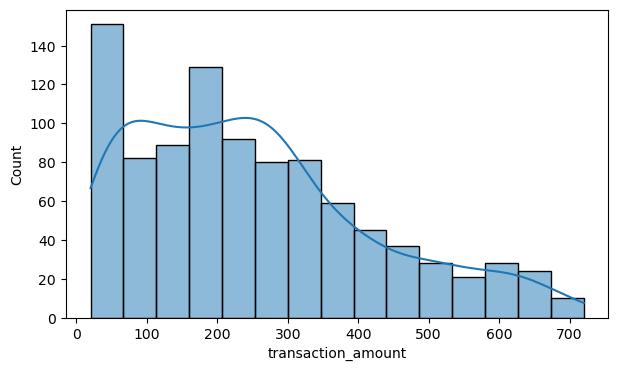

In [88]:
sns.histplot(df.transaction_amount,kde=True)

    Since transaction amount is positivly skewed we need to transform it it make it normal 
    Transaction column has positive values only so i have used box cox method to transform it

In [89]:
from sklearn.preprocessing import PowerTransformer

In [90]:
p = PowerTransformer(method="box-cox")

<Axes: xlabel='transaction_amount_transformed', ylabel='Count'>

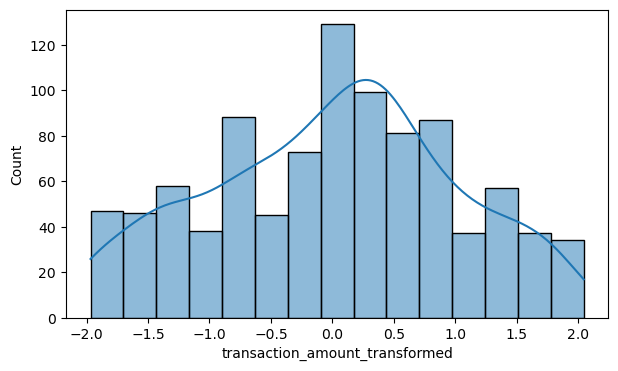

In [91]:
df["transaction_amount_transformed"]=p.fit_transform(df[["transaction_amount"]])

sns.histplot(df.transaction_amount_transformed,kde=True)

# Encoding

    Encoding categorical variables is essential to ensure that machine learning models can effectively utilize and interpret categorical data, leading to accurate predictions and reliable model performance.

In [92]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

In [93]:
l = LabelEncoder()

In [94]:
df.item_name = l.fit_transform(df[["item_name"]])

In [95]:
df.received_by = pd.get_dummies(df[["received_by"]],drop_first=True,dtype="int")

In [96]:
df.time_of_sale.value_counts()

time_of_sale
Afternoon    197
Evening      195
Night        194
Midnight     192
Morning      178
Name: count, dtype: int64

In [97]:
o = OrdinalEncoder(categories=[["Morning","Afternoon","Evening","Night","Midnight"]],dtype="int")

In [98]:
df.time_of_sale = o.fit_transform(df[["time_of_sale"]])

In [99]:
df1=pd.get_dummies(df[["item_type"]],dtype="int")

In [100]:
df2 = pd.get_dummies(df[["transaction_type"]],dtype="int")

In [101]:
df = pd.concat([df,df1,df2],axis=1)

In [102]:
df.drop(columns=["item_type","transaction_type"],inplace=True)

# Spliting target variable and independent variable

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
x= df.drop(columns=["transaction_amount"])

In [105]:
y = df.transaction_amount

In [106]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=100)